# Описание проекта

Необходимо создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика:

1.  Создать модель предсказания ДТП (целевое значение — **at_fault (виновник)** в таблице **parties)**
    -   Для модели выбрать тип виновника — только машина (**car**).
    -   Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    -   Для моделирования ограничиться данными за 2012 год — они самые свежие.
    -   Обязательное условие — учесть фактор возраста автомобиля.
2.  На основе модели исследовать основные факторы ДТП.
3.  Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    -   Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    -   Какие ещё факторы нужно учесть?
    -   Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы.

## Описание таблиц данных

### ER - диаграмма

![image](https://pictures.s3.yandex.net/resources/1.7_2880border_1_1654004672.png)

### **collisions (информация о происшествиях)**

|                      Описание                      |    Обозначение в таблице    |                                                                         Подробнее                                                                        |
|:--------------------------------------------------:|:---------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Идентификационный  Номер в базе данных             | CASE_ID                     | Уникальный номер для зарегистрированного происшествия в таблице происшествий.                                                                            |
| Дата происшествия                                  | COLLISION_DATE              | Формат год/месяц/день                                                                                                                                    |
| Время происшествия                                 | COLLISION_TIME              | Формат: 24-часовой                                                                                                                                       |
| Является ли место происшествие перекрёстком        | INTERSECTION                | Y — Intersection (перекрёсток)                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | N — Not Intersection (не перекрёсток)                                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | -- — Not stated (Не указано)                                                                                                                             |
| Погода                                             | WEATHER_1                   | A — Clear (Ясно)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Cloudy (Облачно)                                                                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Raining (Дождь)                                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Snowing (Снегопад)                                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Fog (Туман)                                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Wind (Ветер)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Серьёзность происшествия                           | COLLISION_DAMAGE            | 1 — FATAL ТС (Не подлежит восстановлению)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 0 – SCRATCH (Царапина)                                                                                                                                   |
| Основной фактор аварии                             | PRIMARY_COLL_FACTOR         | A — Code Violation (Нарушение правил ПДД)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Other Improper Driving (Другое неправильное вождение)                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Other Than Driver (Кроме водителя)                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Unknown (Неизвестно)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Fell Asleep (Заснул)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Состояние дороги                                   | ROAD_SURFACE                | A — Dry (Сухая)                                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Wet (Мокрая)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Snowy or Icy (Заснеженная или обледенелая)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)                                                                               |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Освещение                                          | LIGHTING                    | A — Daylight (Дневной свет)                                                                                                                              |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Dusk-Dawn (Сумерки-Рассвет)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Dark-Street Lights (Темно-Уличные фонари)                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Dark-No Street Lights (Темно-Нет уличных фонарей)                                                                                                    |
|                                                    |                             | E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)                                                                                |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Номер географических районов, где произошло ДТП    | COUNTY_CITY_LOCATION        | число                                                                                                                                                    |
| Названия географических районов, где произошло ДТП | COUNTY_LOCATION             | список разных названий, категориальный тип данных                                                                                                        |
| Направление движения                               | DIRECTION                   | N — North (Север)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — East (Восток)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | S — South (Юг)                                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | W — West (Запад)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - or blank — Not State (Не указано)                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | на перекрёстке                                                                                                                                           |
| Расстояние от главной дороги (метры)               | DISTANCE                    | число                                                                                                                                                    |
| Тип дороги                                         | LOCATION_TYPE               | H — Highway (Шоссе)                                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | I — Intersection (Перекрёсток)                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | R — Ramp (or Collector) (Рампа)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - or blank — Not State Highway (Не указано)                                                                                                              |
| Количество участников                              | PARTY_COUNT                 | число                                                                                                                                                    |
| Категория нарушения                                | PCF_VIOLATION_CATEGORY      | 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения) |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 02 — Impeding Traffic (Препятствие движению транспорта)                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 03 — Unsafe Speed (Превышение скорости)                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 04 — Following Too Closely (Опасное сближение)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 05 — Wrong Side of Road (Неправильная сторона дороги)                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 06 — Improper Passing (Неправильное движение)                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 07 — Unsafe Lane Change (Небезопасная смена полосы движения)                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 08 — Improper Turning (Неправильный поворот)                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 09 — Automobile Right of Way (Автомобильное право проезда)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 10 — Pedestrian Right of Way (Пешеходное право проезда)                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 11 — Pedestrian Violation (Нарушение пешеходами)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 13 — Hazardous Parking (Неправильная парковка)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 14 — Lights (Освещение)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 15 — Brakes (Тормоза)                                                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 16 — Other Equipment (Другое оборудование)                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 17 — Other Hazardous Violation (Другие нарушения)                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 19 — Speeding (Скорость)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 20 — Pedestrian dui (Нарушение пешехода)                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 21 — Unsafe Starting or Backing (Опасный старт)                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 22 — Other Improper Driving (Другое неправильное вождение)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 24 — Fell Asleep (Заснул)                                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 00 — Unknown (Неизвестно)                                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Тип аварии                                         | TYPE_OF_COLLISION           | A — Head-On (Лоб в лоб)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Sideswipe (Сторона)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Rear End (Столкновение задней частью)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Broadside (Боковой удар)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Hit Object (Удар объекта)                                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Overturned (Опрокинутый)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Vehicle (транспортное средство/ Пешеход)                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | H — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Дополнительные участники ДТП                       | MOTOR_VEHICLE_INVOLVED_WITH | Other motor vehicle (Другой автомобиль)                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Fixed object (Неподвижный объект)                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Parked motor vehicle (Припаркованный автомобиль)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Pedestrian (Пешеход)                                                                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Bicycle (Велосипедист)                                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Non-collision (Не столкновение)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Other object (Другой объект)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Motor vehicle on other roadway (Автомобиль на другой проезжей)                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Animal (Животное)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Train (Поезд)                                                                                                                                            |
| Дорожное состояние                                 | ROAD_CONDITION_1            | A — Holes, Deep Ruts (Ямы, глубокая колея)                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Loose Material on Roadway (Сыпучий материал на проезжей части)                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Obstruction on Roadway (Препятствие на проезжей части)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Construction or Repair Zone (Зона строительства или ремонта)                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Reduced Roadway Width (Уменьшенная ширина проезжей части)                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Flooded (Затоплено)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | H — No Unusual Condition (Нет ничего необычного)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Устройство управления                              | CONTROL_CONDITION_1         | A — Functioning (Функционирует)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Not Functioning (Не функционирует)                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Obscured (Затемнённый)                                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — None (Нет)                                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |

### **Parties (описание участников происшествия)**

|                                                                            |                       |                                                                               |
|----------------------------------------------------------------------------|-----------------------|-------------------------------------------------------------------------------|
|                                  Описание                                  | Обозначение в таблице |                                   Подробнее                                   |
| Идентификационный  номер в базе данных                                     | CASE_ID               | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Номер участника происшествия                                               | PARTY_NUMBER          | От 1 до N — по числу участников происшествия                                  |
| Тип участника происшествия                                                 | PARTY_TYPE            | 1 — Car (Авто)                                                                |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 2 — Road bumper (Дорожные знаки)                                              |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 3 — Building (Строения)                                                       |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 4 — Road signs (Отбойник)                                                     |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 5 — Other (Другое)                                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 6 — Operator (Оператор)                                                       |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Виновность участника                                                       | AT_FAULT              | 0/1                                                                           |
| Сумма страховки (тыс. $)                                                   | INSURANCE_PREMIUM     | число                                                                         |
| Состояние участника: физическое или с учётом принятых лекарств             | PARTY_DRUG_PHYSICAL   | E — Under Drug Influence (Под воздействием лекарств)                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | F — Impairment — Physical (Ухудшение состояния)                               |
|                                                                            |                       |                                                                               |
|                                                                            |                       | G — Impairment Unknown (Не известно)                                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | H — Not Applicable (Не оценивался)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | I — Sleepy/Fatigued (Сонный/Усталый)                                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Трезвость участника                                                        | PARTY_SOBRIETY        | A — Had Not Been Drinking (Не пил)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | B — Had Been Drinking, Under Influence (Был пьян, под влиянием)               |
|                                                                            |                       |                                                                               |
|                                                                            |                       | C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)        |
|                                                                            |                       |                                                                               |
|                                                                            |                       | D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)    |
|                                                                            |                       |                                                                               |
|                                                                            |                       | G — Impairment Unknown (Неизвестно ухудшение)                                 |
|                                                                            |                       |                                                                               |
|                                                                            |                       | H — Not Applicable (Не оценивался)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Наличие телефона в автомобиле (возможности разговаривать по громкой связи) | CELLPHONE_IN_USE      | 0/1                                                                           |
|                                                                            |                       |                                                                               |

### Vehicles  **(Описание автомобиля)**

|                Описание               | Обозначение в таблице |                                   Подробнее                                   |
|:-------------------------------------:|:---------------------:|:-----------------------------------------------------------------------------:|
| Индекс текущей таблицы                | ID                    | Номер в таблице                                                               |
| Идентификационный номер в базе данных | CASE_ID               | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Тип кузова                            | VEHICLE_TYPE          | MINIVAN                                                                       |
|                                       |                       |                                                                               |
|                                       |                       | COUPE                                                                         |
|                                       |                       |                                                                               |
|                                       |                       | SEDAN                                                                         |
|                                       |                       |                                                                               |
|                                       |                       | HATCHBACK                                                                     |
|                                       |                       |                                                                               |
|                                       |                       | OTHER                                                                         |
| Тип КПП                               | VEHICLE_TRANSMISSION  | auto (Автоматическая)                                                         |
|                                       |                       |                                                                               |
|                                       |                       | manual (Ручная)                                                               |
|                                       |                       |                                                                               |
|                                       |                       | - — Not Stated (Не указано)                                                   |
| Возраст автомобиля (в годах)          | VEHICLE_AGE           | число                                                                         |

# Подключитесь к базе. Загрузите таблицы sql

In [1]:
import warnings
import time
import re
import random


import pandas as pd
import numpy as np

from sqlalchemy import create_engine


import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split


# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor

# import torch
# import torch.nn as nn
# import torch.optim as optim

# from skorch.callbacks import EpochScoring, EarlyStopping
# from skorch.dataset import ValidSplit ?


# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder

# from torchmetrics import MeanSquaredError
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer

In [3]:
DB_CONFIG = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-science-vehicle-db' # название базы данных
} 

CONNECTION_STR = 'postgresql://{}:{}@{}:{}/{}'.format(
    DB_CONFIG['user'],
    DB_CONFIG['pwd'],
    DB_CONFIG['host'],
    DB_CONFIG['port'],
    DB_CONFIG['db']
)

ENGINE = create_engine(
    CONNECTION_STR + "?options=--transaction-mode=autocommits?slmode=disable",
    isolation_level=None)


RANDOM_STATE = 42
TEST_SIZE = 0.25

# SCALER = MinMaxScaler()
# OHE = OneHotEncoder(drop='first')


sns.set_theme(style="white")

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

warnings.filterwarnings('ignore')

In [4]:
def exec_time(start, end):
    '''
    This function calculates the difference between two given datetime objects
    and returns the difference in the format of HH:MM:SS.

    Parameters
    start: datetime object
    end: datetime object
    Returns
    diff_time (str): The difference between the two given datetime objects in
                     the format of HH:MM:SS.
    '''
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))

    return "Completed for {0:02d}:{1:02d}:{2:02d}".format(h, m, s)

In [5]:
def df_quik_view(df, asc=False, print_time=True):
    '''
    This function provides a quick overview of the input DataFrame by
    returning a summary table containing information such as number of
    unique values, missing values, data type, completeness percentage, and
    unique values of each column in the DataFrame. It also prints general 
    information such as the shape of the table, the number and percentage of
    duplicates in the table, and the memory usage of the table.
    
    Parameters:
    df (pd.DataFrame): a pandas DataFrame to analyze.
    asc (bool): a boolean value indicating whether to sort unique values in
                ascending order. Default is False, which means descending order.
    
    Returns:
    pd.DataFrame: a summary table of the input DataFrame containing the number
                  of unique values, missing values, data type, completeness
                  percentage, and unique values of each column.
    '''
    start = time.time() if print_time else None

    unique_values = []
    for i in df.columns:
        unique_values.append(df[i].sort_values(ascending=asc).unique())

    nans = df.isna().sum()
    table_scan = pd.DataFrame(
        {
            'values_num':    df.count(),
            'nulls_num':     df.isna().sum(),
            'completeness':  100 - (nans / (nans + df.notna().sum()) * 100),
            'uniques_num':   df.nunique(),
            'unique_values': unique_values,
            'dtype':         df.dtypes
        }
    )

    df_shape = df.shape
    duplicates = df.duplicated().sum()
    memory = df.memory_usage(index=False).sum() / 1_000_00
    print('General data analysis:')
    print()
    print('Shape of the table:     ', df_shape)
    print('Duplicates in the table: {}, ({}%)'
          .format(duplicates, round(duplicates / df_shape[0], 4) * 100)
         )
    print('Memory usage:            ' + str(round(memory, 1)) + '+ MB')
    print()

    if print_time:
        end = time.time()
        print('\n')
        print("======================")
        print(exec_time(start, end))
        print("======================")
    
    return table_scan

In [6]:
def sql_query(query, engine=ENGINE, print_time=True):
    if print_time:
        start = time.time()
        table = pd.read_sql_query(query, con=engine)
        end = time.time()
            
        print("Query " + exec_time(start, end).lower())
        print("============================")
        print("\n")

        return table
    else:
        return pd.read_sql_query(query, con=self.engine)

In [186]:
def change_dtypes(data, **dtypes):
    '''
    This function changes the data types of the specified columns in a pandas
    DataFrame and returns the updated DataFrame.
        
    Parameters:
    data (pd.DataFrame): a pandas DataFrame to modify.
    **dtypes (dict): keyword arguments representing the column names and
    new data types to apply to the columns.
        
    Returns:
    pd.DataFrame: a pandas DataFrame with updated data types for the
    specified columns.
    '''
    memory_before = data.memory_usage(index=False).sum()
    print(f'Initial value of memory usage:                 ', memory_before)

    data = data.astype(dtypes)

    memory_after = data.memory_usage(index=False).sum()
    memory_percent = round(
        (memory_before - memory_after) / memory_before * 100,2)

    print('Value of memory usage after changing data types:', memory_after)
    print()
    print(f'Memory usage reduced by {memory_percent}%', '\n')

    return data

## Знакомство с таблицами

### case_ids

In [8]:
sql_query(
    """
    SELECT *
    FROM case_ids
    LIMIT 5;
    """
)

Query completed for 00:00:00




,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


In [9]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM case_ids;
        """
    )
)

Query completed for 00:00:31


General data analysis:

Shape of the table:      (1400000, 2)
Duplicates in the table: 0, (0.0%)
Memory usage:            224.0+ MB



Completed for 00:00:06


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
case_id,1400000,0,100.0,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
db_year,1400000,0,100.0,1,[2021],object


### vehicles

In [10]:
sql_query(
    """
    SELECT *
    FROM vehicles
    LIMIT 5;
    """
)

Query completed for 00:00:00




,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5


In [11]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM vehicles;
        """
    )
)

Query completed for 00:00:54


General data analysis:

Shape of the table:      (1021234, 6)
Duplicates in the table: 0, (0.0%)
Memory usage:            490.2+ MB



Completed for 00:00:08


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
id,1021234,0,100.000000,1021234,"[1517654, 1517653, 1517652, 1517651, 1517650, ...",int64
case_id,1021234,0,100.000000,792642,"[5668360, 5668356, 5668352, 5668349, 5668348, ...",object
party_number,1021234,0,100.000000,27,"[27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 1...",int64
vehicle_type,1021234,0,100.000000,5,"[sedan, other, minivan, hatchback, coupe]",object
vehicle_transmission,997575,23659,97.683293,2,"[manual, auto, None]",object
vehicle_age,996652,24582,97.592912,22,"[161.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14...",float64


### collisions

In [12]:
sql_query(
    """
    SELECT *
    FROM collisions
    LIMIT 5;
    """
)

Query completed for 00:00:00




,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


In [13]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM collisions;
        """
    )
)

Query completed for 00:04:18


General data analysis:

Shape of the table:      (1400000, 20)
Duplicates in the table: 0, (0.0%)
Memory usage:            2240.0+ MB



Completed for 00:01:17


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
case_id,1400000,0,100.000000,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
county_city_location,1400000,0,100.000000,538,"[5802, 5801, 5800, 5704, 5703, 5702, 5701, 570...",object
county_location,1400000,0,100.000000,58,"[yuba, yolo, ventura, tuolumne, tulare, trinit...",object
distance,1400000,0,100.000000,5071,"[8363520.0, 5607360.0, 3263040.0, 2851200.0, 2...",float64
direction,1059358,340642,75.668429,4,"[west, south, north, east, None]",object
intersection,1387781,12219,99.127214,2,"[1.0, 0.0, nan]",float64
weather_1,1392741,7259,99.481500,7,"[wind, snowing, raining, other, fog, cloudy, c...",object
location_type,518779,881221,37.055643,3,"[ramp, intersection, highway, None]",object
collision_damage,1400000,0,100.000000,5,"[small damage, severe damage, scratch, middle ...",object
party_count,1400000,0,100.000000,18,"[27, 21, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7, ...",int64


### parties

In [14]:
sql_query(
    """
    SELECT *
    FROM parties
    LIMIT 5;
    """
)

Query completed for 00:00:00




,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0


In [15]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM parties;
        """
    )
)

Query completed for 00:03:23


General data analysis:

Shape of the table:      (2752408, 9)
Duplicates in the table: 0, (0.0%)
Memory usage:            1981.7+ MB



Completed for 00:00:35


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
id,2752408,0,100.000000,2752408,"[2752408, 2752407, 2752406, 2752405, 2752404, ...",int64
case_id,2752408,0,100.000000,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
party_number,2752408,0,100.000000,27,"[27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 1...",int64
party_type,2748786,3622,99.868406,5,"[road signs, road bumper, other, car, building...",object
at_fault,2752408,0,100.000000,2,"[1, 0]",int64
insurance_premium,2347006,405402,85.271006,106,"[105.0, 104.0, 103.0, 102.0, 101.0, 100.0, 99....",float64
party_sobriety,2678453,73955,97.313080,6,"[not applicable, impairment unknown, had not b...",object
party_drug_physical,432288,2320120,15.705811,5,"[under drug influence, sleepy/fatigued, not ap...",object
cellphone_in_use,2240771,511637,81.411295,2,"[1.0, 0.0, nan]",float64


#  Проведите статистический анализ факторов ДТП

## collisions

### Даты

In [95]:
def analyze_data(data, x, y, rotation=45, hue=None, figsize=None):
    color = '#CC8963' if hue is None else None
    data[x] = data[x].fillna("Unknow")

    sns.set_theme(style="whitegrid")
    print('Visualization of categorical data')
    print()

    figure, (ax_bar) = plt.subplots(
                1, 1, figsize=(18, 5) if figsize is None else figsize)
    sns.barplot(data=data, x=x, y=y, hue=hue,
                linewidth=0.5, ax=ax_bar,
                color=color, alpha=0.8).set_title(
                    f"{x} distribution by {y}", y=1.02, fontsize=14)

    ax_bar.tick_params(axis='x', rotation=rotation)
    plt.show()
    print()

#### Месяц

Query completed for 00:00:01


Visualization of categorical data



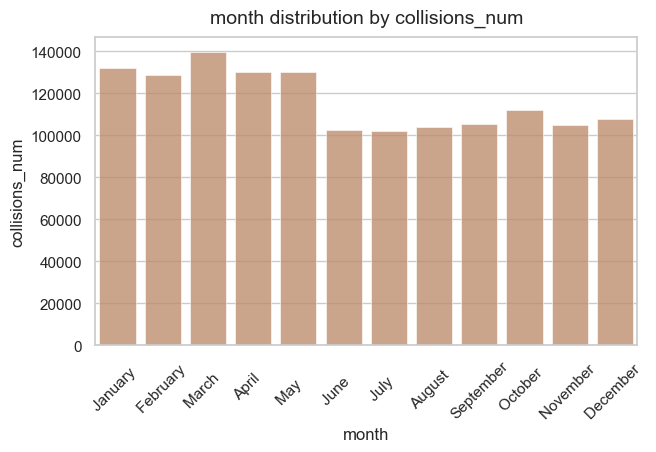

In [96]:
analyze_data(
    data=sql_query(
        """
        SELECT
            month,
            collisions_num
        FROM (
            SELECT
                EXTRACT(MONTH FROM collision_date) AS month_num,
                to_char(collision_date, 'Month') AS month, 
                COUNT(*) AS collisions_num
            FROM 
                collisions
            GROUP BY
                month_num,
                to_char(collision_date, 'Month')
            ORDER BY
                month_num ASC
        ) AS t;
        """
    ),
    x="month", y="collisions_num",
    figsize=(7, 4)
)

#### День недели

Query completed for 00:00:01


Visualization of categorical data



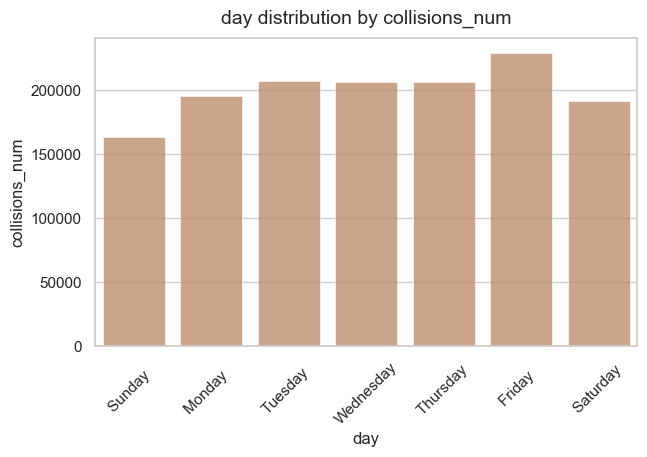

In [97]:
analyze_data(
    data=sql_query(
        """
        SELECT
            day,
            collisions_num
        FROM (
            SELECT
                EXTRACT(DOW FROM collision_date) AS day_num,
                to_char(collision_date, 'Day') AS day, 
                COUNT(*) AS collisions_num
            FROM 
                collisions
            GROUP BY
                day_num,
                to_char(collision_date, 'Day')
            ORDER BY
                day_num ASC
        ) AS t;
        """
    ),
    x="day", y="collisions_num",
    figsize=(7, 4)
)

#### Час

Query completed for 00:00:00


Visualization of categorical data



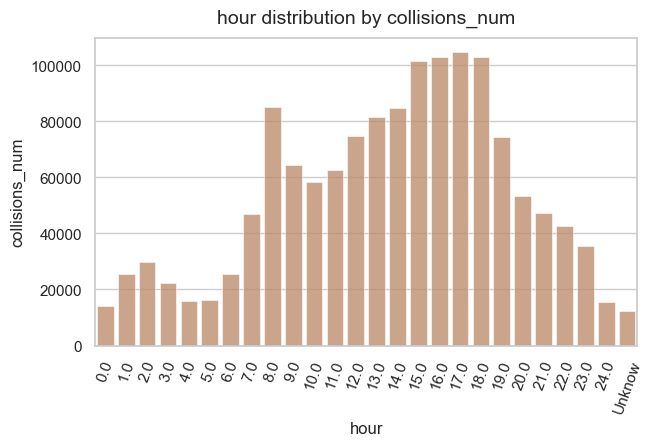

In [98]:
analyze_data(
    data=sql_query(
        """
        SELECT
            CASE 
                WHEN EXTRACT(MINUTE FROM collision_time) >= 30 
                    THEN (EXTRACT(HOUR FROM collision_time) + 1)::integer
                ELSE EXTRACT(HOUR FROM collision_time)::integer
            END AS hour,
            COUNT(*) AS collisions_num
        FROM 
            collisions
        GROUP BY
            hour
        """
    ),
    x="hour", y="collisions_num",
    rotation=70,
    figsize=(7, 4)
)

### Серьезность происшествия и трезвость виновников

Query completed for 00:00:04


Visualization of categorical data



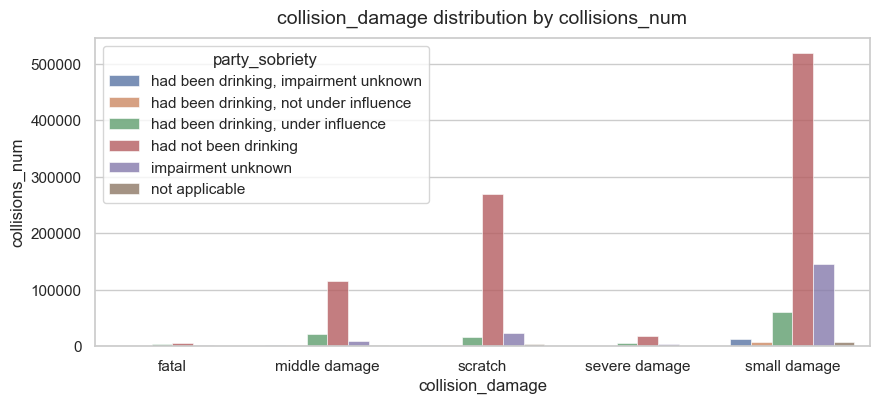

In [99]:
analyze_data(
    data=sql_query(
        """
        SELECT 
            c.collision_damage, 
            p.party_sobriety, 
            COUNT(*) AS collisions_num
        FROM 
            parties p
            LEFT JOIN collisions c ON p.case_id = c.case_id
        WHERE
            p.at_fault = 1
        GROUP BY 
            c.collision_damage, 
            p.party_sobriety;
        """
    ),
    x="collision_damage", y="collisions_num", hue="party_sobriety",
    rotation=0,
    figsize=(10, 4)
)

### Серьезность происшествия и средний возраст автомобиля

Query completed for 00:00:01


Visualization of categorical data



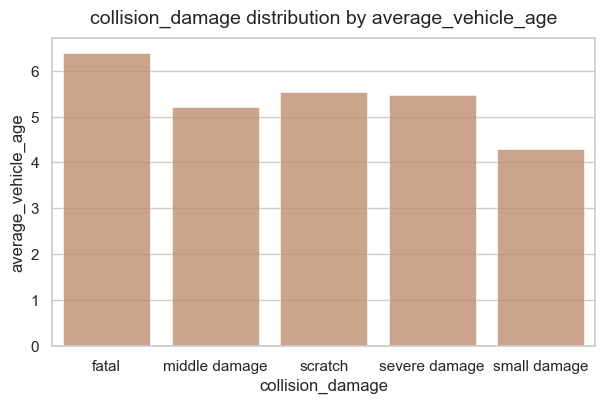

In [100]:
analyze_data(
    data=sql_query(
        """
        SELECT 
            c.collision_damage, 
            avg(v.vehicle_age) as average_vehicle_age 
        FROM 
            collisions c 
            left join vehicles v on c.case_id = v.case_id 
        GROUP BY 
            c.collision_damage
        """
    ),
    x="collision_damage", y="average_vehicle_age",
    rotation=0,
    figsize=(7, 4)
)

# Создайте модель для оценки водительского риска

In [153]:
# Parameters not included in the dataset due to data leakage
collisions_ls = [
    "party_count", "primary_collision_factor", "pcf_violation_category",
    "type_of_collision", "motor_vehicle_involved_with"
]
parties_ls = ["party_number", "party_sobriety", "party_drug_physical"]


# Dataset flags
collisions_flags = ["collision_damage"]
parties_flags = ["party_type"]


# Potential dataset features
collisions_features = [
    "control_device", "collision_date", "collision_time",
    "county_city_location", "county_location", "distance", "direction",
    "intersection", "weather_1", "location_type", "road_surface",
    "road_condition_1", "lighting"
]
parties_features = ["at_fault", "insurance_premium", "cellphone_in_use"]
vehicles_features = ["vehicle_type", "vehicle_transmission", "vehicle_age"]


# Potential features suspected of data leakage
collisions_pl = [
    "county_city_location", "county_location", "distance", "direction",
    "intersection", "weather_1", "location_type", "road_surface",
    "road_condition_1", "lighting", "collision_date", "collision_time"
]
parties_pl = ["cellphone_in_use"]

In [185]:
dds = sql_query(
    f"""
    SELECT
        {", ".join("c." + el for el in collisions_pl)},
        {", ".join("p." + el for el in parties_pl)}
    FROM
        parties AS p
        LEFT JOIN collisions AS c ON p.case_id = c.case_id
        LEFT JOIN vehicles AS v ON p.case_id = v.case_id
    WHERE
        {"c." + collisions_flags[0]} NOT LIKE 'scratch'
        AND {"p." + parties_flags[0]} LIKE 'car'
    """
)

print("Dataset sketch sample:")
display(dds.head(3))
print()
df_quik_view(dds)

Query completed for 00:02:06


Dataset sketch sample:


,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,road_surface,road_condition_1,lighting,collision_date,collision_time,cellphone_in_use
0,3902,san joaquin,121.0,east,0.0,clear,None,dry,normal,daylight,2009-01-16,19:53:00,0.0
1,1000,fresno,2640.0,north,0.0,fog,highway,dry,normal,daylight,2009-01-12,08:21:00,0.0
2,3801,san francisco,2640.0,south,0.0,clear,highway,dry,normal,daylight,2009-02-12,16:45:00,0.0



General data analysis:

Shape of the table:      (2058169, 13)
Duplicates in the table: 966926, (46.98%)
Memory usage:            2140.5+ MB



Completed for 00:00:45


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
county_city_location,2058169,0,100.000000,537,"[5802, 5801, 5800, 5704, 5703, 5702, 5701, 570...",object
county_location,2058169,0,100.000000,58,"[yuba, yolo, ventura, tuolumne, tulare, trinit...",object
distance,2058169,0,100.000000,4686,"[8363520.0, 5607360.0, 3263040.0, 2851200.0, 2...",float64
direction,1571478,486691,76.353205,4,"[west, south, north, east, None]",object
intersection,2043587,14582,99.291506,2,"[1.0, 0.0, nan]",float64
weather_1,2048427,9742,99.526667,7,"[wind, snowing, raining, other, fog, cloudy, c...",object
location_type,892853,1165316,43.380937,3,"[ramp, intersection, highway, None]",object
road_surface,2040316,17853,99.132579,4,"[wet, snowy, slippery, dry, None]",object
road_condition_1,2042196,15973,99.223922,8,"[reduced width, other, obstruction, normal, lo...",object
lighting,2046797,11372,99.447470,5,"[dusk or dawn, daylight, dark with street ligh...",object


In [197]:
pd.to_datetime(dds["collision_date"])

0         2009-01-16
1         2009-01-12
2         2009-02-12
3         2009-01-29
4         2009-01-16
             ...    
2058164   2012-02-04
2058165   2012-03-21
2058166   2012-03-21
2058167   2011-04-13
2058168   2011-04-13
Name: collision_date, Length: 2058169, dtype: datetime64[ns]

In [199]:
dds["collision_date"] = pd.to_datetime(dds["collision_date"])
dds["collision_time"] = pd.to_datetime(
    dds["collision_time"], format='%H:%M:%S').dt.hour

dtypes = {
    "county_city_location":     "category",
    "county_location":          "category",
    "distance":                 "float32",
    "direction":                "category",
    "intersection":             "float16",
    "weather_1":                "category",
    "location_type":            "category",
    "road_surface":             "category",
    "road_condition_1":         "category",
    "lighting":                 "category",
    "cellphone_in_use":         "float16",
    "collision_time":           "float16"
}

dds = change_dtypes(dds, **dtypes)
df_quik_view(dds)

Initial value of memory usage:                  67944465
Value of memory usage after changing data types: 55595451

Memory usage reduced by 18.18% 

General data analysis:

Shape of the table:      (2058169, 13)
Duplicates in the table: 975382, (47.39%)
Memory usage:            556.0+ MB



Completed for 00:00:03


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
county_city_location,2058169,0,100.000000,537,"['5802', '5801', '5800', '5704', '5703', ..., ...",category
county_location,2058169,0,100.000000,58,"['yuba', 'yolo', 'ventura', 'tuolumne', 'tular...",category
distance,2058169,0,100.000000,4686,"[8363520.0, 5607360.0, 3263040.0, 2851200.0, 2...",float32
direction,1571478,486691,76.353205,4,"['west', 'south', 'north', 'east', NaN] Catego...",category
intersection,2043587,14582,99.291506,2,"[1.0, 0.0, nan]",float16
weather_1,2048427,9742,99.526667,7,"['wind', 'snowing', 'raining', 'other', 'fog',...",category
location_type,892853,1165316,43.380937,3,"['ramp', 'intersection', 'highway', NaN] Categ...",category
road_surface,2040316,17853,99.132579,4,"['wet', 'snowy', 'slippery', 'dry', NaN] Categ...",category
road_condition_1,2042196,15973,99.223922,8,"['reduced width', 'other', 'obstruction', 'nor...",category
lighting,2046797,11372,99.447470,5,"['dusk or dawn', 'daylight', 'dark with street...",category


# Проведите анализ важности факторов ДТП

# Выводы